## Solve Differential Equations in Python GEKKO

![Solve with ODEINT](https://apmonitor.com/pdc/uploads/Main/solve_ODEs_gekko.png)

See https://apmonitor.com/pdc for [source code](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) and additional material.

Differential equations are solved in Python with the _GEKKO_ package. _GEKKO_ is available with pip install.

In [ ]:
pip install gekko

_GEKKO_ is an optimization and simulation environment for Python that is different than other packages. In addition to simulation, _GEKKO_ is an [optimization package](https://gekko.readthedocs.io/en/latest/) for dynamic systems]]

## Example Problem

An example of using _GEKKO_ is with the following differential equation with parameter $k=0.3$, the initial condition $y_0=5$ and the following differential equation.

$\frac{dy(t)}{dt} = -k \; y(t)$

The Python code first imports the needed packages. The model, initial conditions, and time points are defined as inputs to _GEKKO_ to numerically calculate $y(t)$.

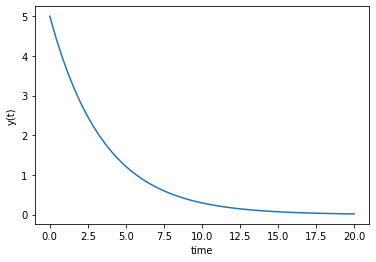

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model
k = 0.3        # constant
y = m.Var(5.0) # create GEKKO variable
m.Equation(y.dt()==-k*y) # create GEKKO equation
m.time = np.linspace(0,20) # time points

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Additional Input Arguments

Input parameters such as _k_ can be changed to generate a different solution with a different input parameter. The argument _k_ is now an adjustable parameter.  

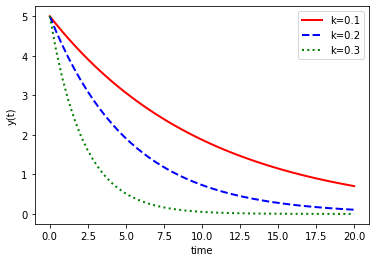

In [2]:
m = GEKKO()    # create GEKKO model
k = m.Param()  # constant
y = m.Var(5.0) # create GEKKO variable
m.Equation(y.dt()==-k*y) # create GEKKO equation
m.time = np.linspace(0,20) # time points

# solve ODEs and plot
m.options.IMODE = 4
m.options.TIME_SHIFT=0

k.value = 0.1
m.solve(disp=False)
plt.plot(m.time,y,'r-',linewidth=2,label='k=0.1')

k.value = 0.2
m.solve(disp=False)
plt.plot(m.time,y,'b--',linewidth=2,label='k=0.2')

k.value = 0.5
m.solve(disp=False)
plt.plot(m.time,y,'g:',linewidth=2,label='k=0.3')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Exercises

Find a numerical solution to the following differential equations with the associated initial conditions. Expand the requested time horizon until the solution reaches a steady state. Show a plot of the states ($x(t)$ and/or $y(t)$). Report the final value of each state as $t \to \infty$.

## Problem 1

$\frac{dy(t)}{dt} = -y(t) + 1$

$y(0) = 0$

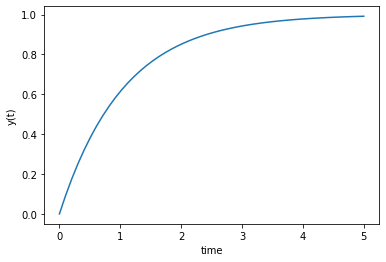

In [3]:
m = GEKKO()    # create GEKKO model
y = m.Var(0.0) # create GEKKO variable
m.Equation(y.dt()==-y+1) # create GEKKO equation
m.time = np.linspace(0,5) # time points

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [4]:
# calculate Steady State
m.options.IMODE = 3
m.solve(disp=False)
print('Final Value: ' + str(y.value))

Final Value: [1.0]


## Problem 2

$5 \; \frac{dy(t)}{dt} = -y(t) + u(t)$

$y(0) = 1$

$u$ steps from $0$ to $2$ at $t=10$

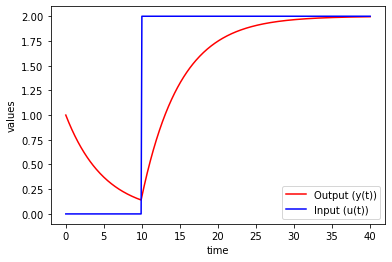

In [5]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,40,401) # time points

# create GEKKO parameter (step 0 to 2 at t=10)
u_step = np.zeros(401)
u_step[100:] = 2.0
u = m.Param(value=u_step)  

y = m.Var(1.0) # create GEKKO variable
m.Equation(5 * y.dt()==-y+u) # create GEKKO equation

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y,'r-',label='Output (y(t))')
plt.plot(m.time,u,'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Problem 3

Solve for $x(t)$ and $y(t)$ and show that the solutions are equivalent.

$\frac{dx(t)}{dt} = 3 \; exp(-t)$

$\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0$

$y(0) = 0$

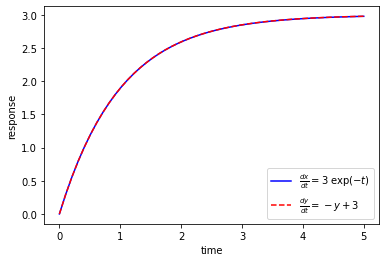

In [6]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,5) # time points

t = m.Var(0.0) # create GEKKO time
x = m.Var(0.0) # create GEKKO variable x
y = m.Var(0.0) # create GEKKO variable y

# create GEKKO equations
m.Equation(t.dt()==1)
m.Equation(x.dt()==3*m.exp(-t))
m.Equation(y.dt()==3-y) 

# solve ODE
m.options.IMODE = 4
m.options.NODES = 3
m.solve(disp=False)

# plot results
plt.plot(t,x,'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,y,'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Problem 4

$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$

$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$

$u = 2 \, S(t-5)$

$x(0) = 0$

$y(0) = 0$

where $S(t-5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

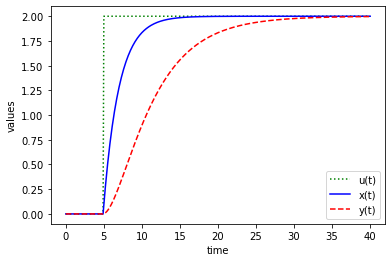

In [7]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,40,401) # time points

# create GEKKO parameter (step 0 to 2 at t=5)
u_step = np.zeros(401)
u_step[50:] = 2.0
u = m.Param(value=u_step)

# create GEKKO variables
x = m.Var(0.0) 
y = m.Var(0.0) 

# create GEKKO equations
m.Equation(2*x.dt()==-x+u) 
m.Equation(5*y.dt()==-y+x) 

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,u,'g:',label='u(t)')
plt.plot(m.time,x,'b-',label='x(t)')
plt.plot(m.time,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()